### Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gymnasium as gym  # Switch to Gymnasium
from IPython import display

### Info: Gym interface
The three main methods of an environment are

- reset(): reset environment to the initial state, return first observation
- render(): show current environment state (a more colorful version :) )
- step(a): commit action a and return (new_observation, reward, is_done, info)
- new_observation: an observation right after committing the action a
- reward: a number representing your reward for committing action a
- is_done: True if the MDP has just finished, False if still in progress
- info: some auxiliary stuff about what just happened. For now, ignore it.

### Initialize the environment with the render mode set to 'rgb_array'

In [31]:
# Create the environment with render_mode set to 'rgb_array'
TIME_LIMIT = 250
env = gym.make("MountainCar-v0", render_mode="rgb_array")
env = gym.wrappers.TimeLimit(env, max_episode_steps=TIME_LIMIT + 1)  # Wrap with TimeLimit

# Action mapping
actions = {'left': 0, 'stop': 1, 'right': 2}

### Define the policy function

In [32]:
# Define policy function
def policy(obs, t):
    position, velocity = obs
    return actions['right']

### Run the simulation

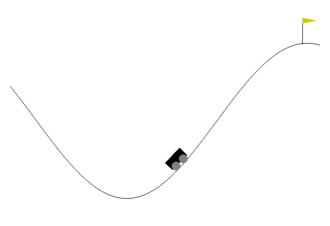

In [33]:
# Run the simulation
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs, info = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()

    action = policy(obs, t)  # Call your policy
    obs, reward, done, truncated, _ = env.step(action)  # Unpack 5 values now

    # Draw game image on display
    plt.imshow(env.render())  # Render using the 'rgb_array' mode
    plt.axis('off')  # Hide the axis for better visualization
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # Check if the episode is over (either done or truncated)
    if done or truncated:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

In [ ]:
assert obs[0] > 0.47
print("You solved it!")